# Oversempling Method

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
diabetes = pd.read_csv('../../cleaned_datasets/cleaned_diabetes.csv')
heart_disease = pd.read_csv('../../cleaned_datasets/heart-disease-cleaned.csv')
stroke = pd.read_csv('../../cleaned_datasets/normalized_stroke_dataset.csv')
hypertension = pd.read_csv('../../cleaned_datasets/hypertension_cleaned.csv')

print(diabetes.duplicated().sum())
print(heart_disease.duplicated().sum())
print(stroke.duplicated().sum())
print(hypertension.duplicated().sum())

0
1717
0
0


In [3]:
# Data Exploration
def explore_dataset(df, name):
    print(f"\nExploring {name} dataset:")
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    
    # Display first few rows
    print("\nFirst few rows:")
    print(df.head())
    
    # Basic statistics
    print("\nBasic statistics:")
    print(df.describe())

datasets = {
        'Diabetes': diabetes,
        'Heart Disease': heart_disease,
        'Stroke': stroke,
        'Hypertension': hypertension
    }
    
for name, df in datasets.items():
    explore_dataset(df, name)


Exploring Diabetes dataset:

Shape: (88195, 9)

Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data types:
 gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

First few rows:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0    

## Data Cleaning

In [4]:
def handle_outliers(df, columns_to_check, method='iqr'):
    """
    Handle outliers in specified columns using either IQR method or Z-score
    """
    df_clean = df.copy()
    
    for column in columns_to_check:
        if method == 'iqr':
            # Calculate IQR
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Handle outliers by capping
            df_clean[column] = df_clean[column].clip(lower_bound, upper_bound)
            
        elif method == 'zscore':
            # Calculate Z-score
            z_scores = np.abs((df_clean[column] - df_clean[column].mean()) / df_clean[column].std())
            
            # Cap values where z-score > 3
            df_clean.loc[z_scores > 3, column] = df_clean[column].mean()
    
    return df_clean

def remove_duplicates(df):
    """
    Remove duplicate rows while keeping the first occurrence
    """
    initial_rows = len(df)
    df_unique = df.drop_duplicates()
    removed_rows = initial_rows - len(df_unique)
    print(f"Removed {removed_rows} duplicate rows")
    return df_unique

In [5]:
# Diabetes Dataset
def clean_diabetes_data(df):
    # Copy dataframe to avoid modifications to original
    df_clean = df.copy()

    # Handle outliers in BMI (using domain knowledge)
    df_clean = handle_outliers(df_clean, ['bmi'], method='iqr')
    
    # Check and handle any missing values
    if df_clean.isnull().sum().any():
        df_clean = df_clean.dropna()

    # Remove duplicate rows
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

diabetes_cleaned = clean_diabetes_data(diabetes)

Removed 56 duplicate rows


In [6]:
# Heart Disease Dataset
def clean_heart_disease_data(df):
    df_clean = df.copy()
    
    # Ensure numerical values are float
    numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    df_clean[numeric_columns] = df_clean[numeric_columns].astype(float)

    # Handle outliers in numerical columns
    df_clean = handle_outliers(df_clean, numeric_columns, method='iqr')
    
    # Convert categorical variables if needed
    categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    for col in categorical_columns:
        df_clean[col] = df_clean[col].astype(int)

    # Remove duplicates
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

heart_cleaned = clean_heart_disease_data(heart_disease)

heart_cleaned.head(10)

# Also apply for hypertension since they have the same feature
hypertension_cleaned = clean_heart_disease_data(hypertension)

print(heart_cleaned.head(10))
print(hypertension.head(10))

Removed 1717 duplicate rows
Removed 0 duplicate rows
     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   51.0    0   2     130.0  256.0    0        0    149.0      0      0.5   
1   61.0    1   0     138.0  166.0    0        0    125.0      1      3.6   
2   63.0    0   0     124.0  197.0    0        1    136.0      1      0.0   
3   68.0    1   0     144.0  193.0    1        1    141.0      0      3.4   
4   61.0    1   2     150.0  243.0    1        1    137.0      1      1.0   
5   63.0    0   2     135.0  252.0    0        0    172.0      0      0.0   
7   48.0    1   0     124.0  274.0    0        0    166.0      0      0.5   
8   46.0    0   0     138.0  243.0    0        0    152.0      1      0.0   
9   40.0    1   0     152.0  223.0    0        1    181.0      0      0.0   
10  66.0    1   0     120.0  302.0    0        0    151.0      0      0.4   

    slope  ca  thal  target  
0       2   0     2       1  
1       1   1     2       0  
2       1

In [7]:
# Sroke Disease Dataset
def clean_stroke_data(df):
    df_clean = df.copy()

    # Handle outliers in BMI and other numerical columns
    numeric_columns = ['bmi', 'age']
    df_clean = handle_outliers(df_clean, numeric_columns, method='iqr')
    
    # Convert smoking_status to numeric
    smoking_map = {
        'never smoked': 0,
        'Unknown': 0,
        'formerly smoked': 2,
        'smokes': 1
    }
    df_clean['smoking_status'] = df_clean['smoking_status'].map(smoking_map)
    
    # Ensure sex is binary (0: Female, 1: Male)
    le = LabelEncoder()
    df_clean['sex'] = le.fit_transform(df_clean['sex'])

    # Remove duplicates
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

stroke_cleaned = clean_stroke_data(stroke)

stroke_cleaned.head(10)

Removed 0 duplicate rows


,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke
0,67,0,1,36.600000,228.69,0,2,1
1,61,0,0,28.893237,202.21,1,0,1
2,80,0,1,32.500000,105.92,0,0,1
3,49,0,0,34.400000,171.23,1,1,1
4,79,1,0,24.000000,174.12,1,0,1
5,81,0,0,29.000000,186.21,0,2,1
6,74,1,1,27.400000,70.09,0,0,1
7,69,0,0,22.800000,94.39,1,0,1
8,59,0,0,28.893237,76.15,1,0,1
9,78,0,0,24.200000,58.57,1,0,1


### Feature selection

In [8]:
def select_common_features(diabetes_df, heart_df, stroke_df, hypertension_df):
    # Select relevant features from each dataset
    diabetes_features = diabetes_df[['age', 'gender', 'bmi', 'blood_glucose_level', 'diabetes']]
    heart_features = heart_df[['age', 'sex', 'trestbps', 'chol', 'target']]
    stroke_features = stroke_df[['age', 'sex', 'bmi', 'hypertension', 'stroke']]
    hypertension_features = hypertension_df[['age', 'sex', 'trestbps', 'chol', 'target']]
    
    # Rename columns for consistency
    diabetes_features = diabetes_features.rename(columns={
        'gender': 'sex',
        'diabetes': 'target_diabetes'
    })
    
    heart_features = heart_features.rename(columns={
        'trestbps': 'blood_pressure',
        'target': 'target_heart'
    })
    
    stroke_features = stroke_features.rename(columns={
        'stroke': 'target_stroke'
    })
    
    hypertension_features = hypertension_features.rename(columns={
        'trestbps': 'blood_pressure',
        'target': 'target_hypertension'
    })
    
    # Remove duplicates after feature selection
    print("\nBefore removing duplicates:")
    print(f"Diabetes features shape: {diabetes_features.shape}")
    print(f"Heart features shape: {heart_features.shape}")
    print(f"Stroke features shape: {stroke_features.shape}")
    print(f"Hypertension features shape: {hypertension_features.shape}")
    
    diabetes_features = diabetes_features.drop_duplicates()
    heart_features = heart_features.drop_duplicates()
    stroke_features = stroke_features.drop_duplicates()
    hypertension_features = hypertension_features.drop_duplicates()
    
    print("\nAfter removing duplicates:")
    print(f"Diabetes features shape: {diabetes_features.shape}")
    print(f"Heart features shape: {heart_features.shape}")
    print(f"Stroke features shape: {stroke_features.shape}")
    print(f"Hypertension features shape: {hypertension_features.shape}")
    
    # Additional check for data quality
    def check_dataset(df, name):
        print(f"\nChecking {name} dataset:")
        print("Null values:\n", df.isnull().sum())
        print("Value counts for target:")
        target_col = [col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]
        print(df[target_col].value_counts())
    
    for df, name in zip([diabetes_features, heart_features, stroke_features, hypertension_features],
                       ['Diabetes', 'Heart Disease', 'Stroke', 'Hypertension']):
        check_dataset(df, name)
    
    return diabetes_features, heart_features, stroke_features, hypertension_features

# Test the updated function
diabetes_features, heart_features, stroke_features, hypertension_features = select_common_features(
    diabetes_cleaned, heart_cleaned, stroke_cleaned, hypertension_cleaned
)

# Verify no duplicates remain
print("\nFinal duplicate check:")
print(f"Diabetes duplicates: {diabetes_features.duplicated().sum()}")
print(f"Heart disease duplicates: {heart_features.duplicated().sum()}")
print(f"Stroke duplicates: {stroke_features.duplicated().sum()}")
print(f"Hypertension duplicates: {hypertension_features.duplicated().sum()}")


Before removing duplicates:
Diabetes features shape: (88139, 5)
Heart features shape: (283, 5)
Stroke features shape: (5109, 5)
Hypertension features shape: (24422, 5)

After removing duplicates:
Diabetes features shape: (67681, 5)
Heart features shape: (283, 5)
Stroke features shape: (4706, 5)
Hypertension features shape: (23694, 5)

Checking Diabetes dataset:
Null values:
 age                    0
sex                    0
bmi                    0
blood_glucose_level    0
target_diabetes        0
dtype: int64
Value counts for target:
target_diabetes
0    63542
1     4139
Name: count, dtype: int64

Checking Heart Disease dataset:
Null values:
 age               0
sex               0
blood_pressure    0
chol              0
target_heart      0
dtype: int64
Value counts for target:
target_heart
1    158
0    125
Name: count, dtype: int64

Checking Stroke dataset:
Null values:
 age              0
sex              0
bmi              0
hypertension     0
target_stroke    0
dtype: int64
Valu


Data Quality Check for Diabetes:
Outliers in age: 0
Outliers in sex: 0
Outliers in bmi: 0
Outliers in blood_glucose_level: 0
Outliers in target_diabetes: 4139
Number of duplicate rows: 0


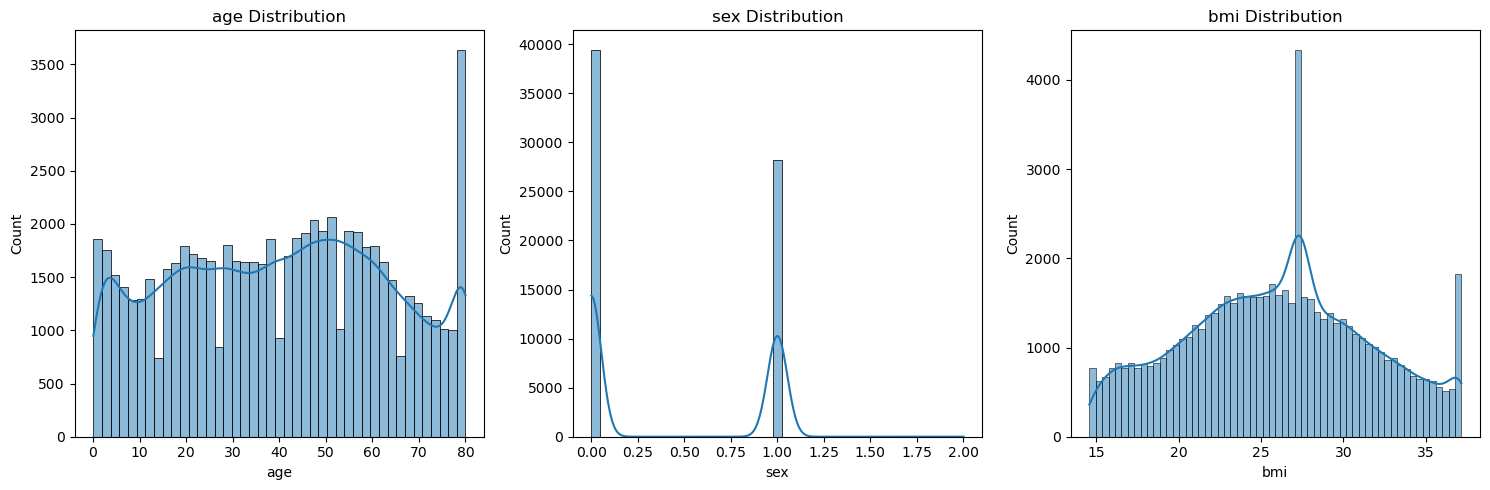


Data Quality Check for Heart Disease:
Outliers in age: 0
Outliers in sex: 0
Outliers in blood_pressure: 0
Outliers in chol: 0
Outliers in target_heart: 0
Number of duplicate rows: 0


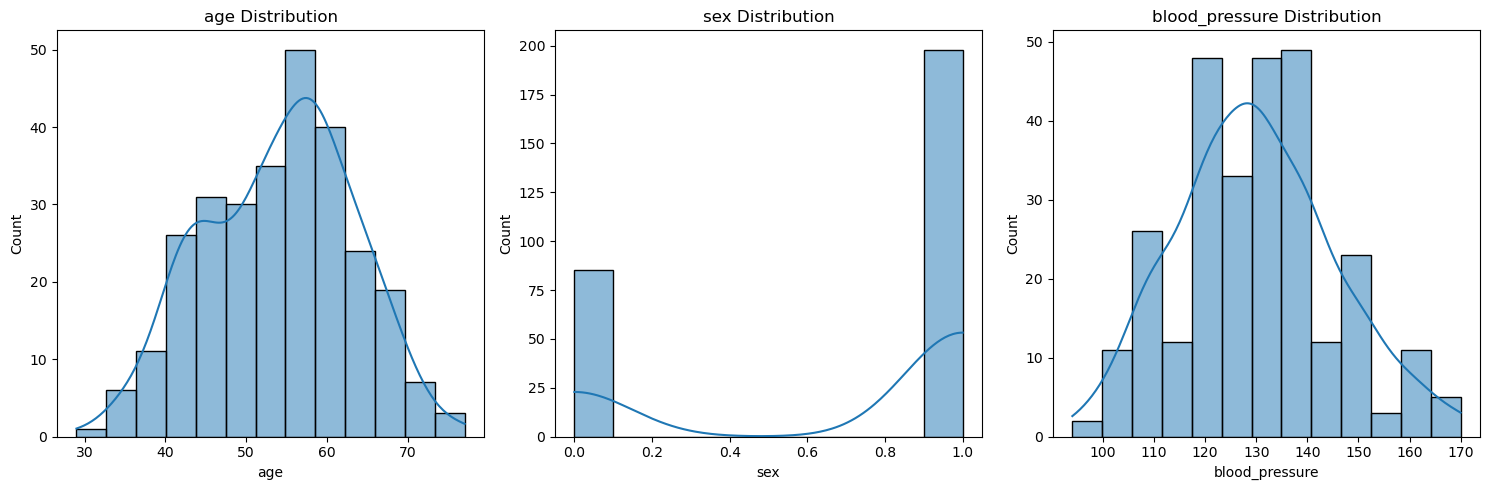


Data Quality Check for Stroke:
Outliers in age: 0
Outliers in sex: 0
Outliers in bmi: 1
Outliers in hypertension: 486
Outliers in target_stroke: 239
Number of duplicate rows: 0


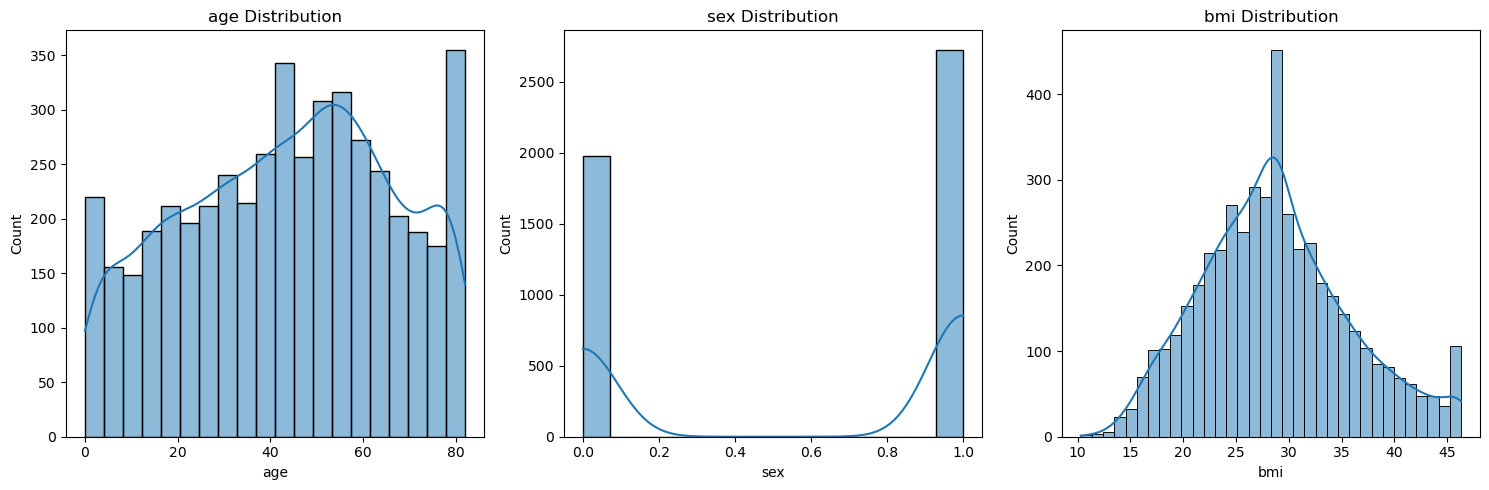


Data Quality Check for Hypertension:
Outliers in age: 0
Outliers in sex: 0
Outliers in blood_pressure: 0
Outliers in chol: 0
Outliers in target_hypertension: 0
Number of duplicate rows: 0


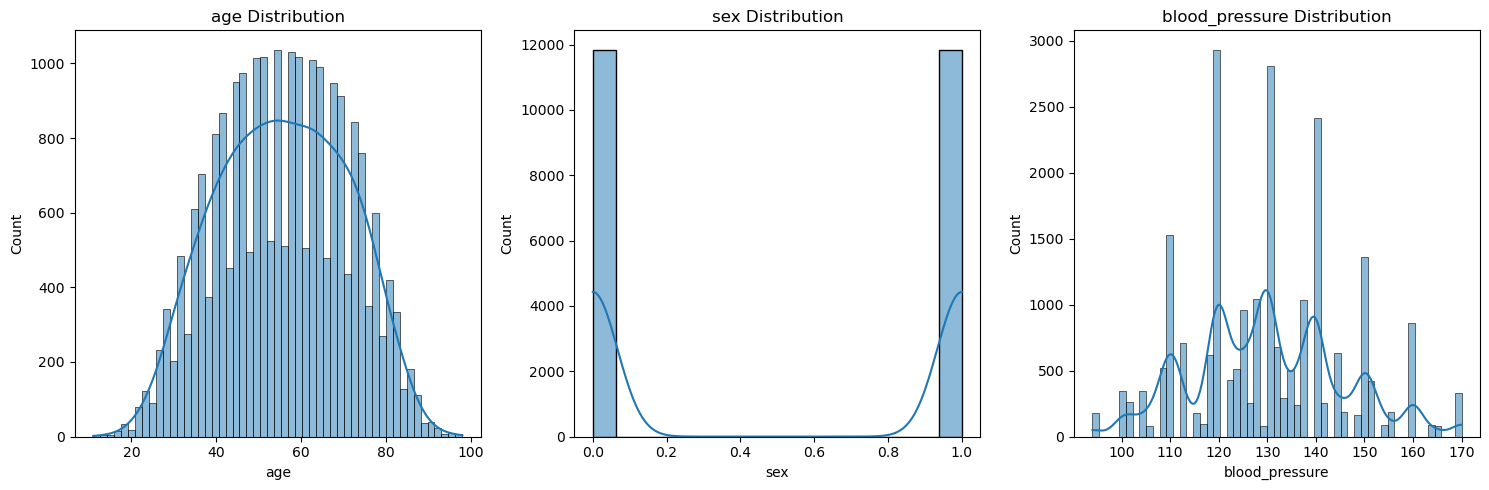

In [9]:
# Check Data Quality
def check_data_quality(df, name):
    print(f"\nData Quality Check for {name}:")
    
    # Check for outliers using IQR method
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"Outliers in {col}: {outliers}")
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    # Distribution plots for numeric columns
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numeric_cols[:3], 1):  # Limit to first 3 columns for brevity
        plt.subplot(1, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

for name, df in {
        'Diabetes': diabetes_features,
        'Heart Disease': heart_features,
        'Stroke': stroke_features,
        'Hypertension': hypertension_features
    }.items():
        check_data_quality(df, name)

In [10]:
print(f"Diabetes shape: {diabetes_features.shape}")
print(f"Heart disease shape: {heart_features.shape}")
print(f"Stroke shape: {stroke_features.shape}")
print(f"Hypertension shape: {hypertension_features.shape}")

Diabetes shape: (67681, 5)
Heart disease shape: (283, 5)
Stroke shape: (4706, 5)
Hypertension shape: (23694, 5)


### Oversampled

#### Random Oversample Method

In [11]:
from imblearn.over_sampling import RandomOverSampler

def oversample_to_target_size(df, target, target_size):
    current_size = len(df)
    if current_size >= target_size:
        # If the dataset is already larger or equal, return it as-is
        return df
    
    # Calculate the proportion of minority samples needed relative to the majority
    sampling_strategy = target_size / current_size
    
    # Ensure the sampling strategy stays within the valid range (0, 1]
    if sampling_strategy > 1.0:
        sampling_strategy = 1.0
    
    # Apply RandomOverSampler
    ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
    X = df.drop(columns=[target])
    y = df[target]
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    # Combine the resampled data into a DataFrame
    df_resampled = pd.concat([X_resampled, y_resampled.rename(target)], axis=1)
    
    # Return exactly the target size by sampling if overshot
    return df_resampled.sample(n=target_size, replace=True, random_state=42)

target_size = len(diabetes_features)  # Match the largest dataset
heart_ros = oversample_to_target_size(heart_features, "target_heart", target_size)
stroke_ros = oversample_to_target_size(stroke_features, "target_stroke", target_size)
hypertension_ros = oversample_to_target_size(hypertension_features, "target_hypertension", target_size)

# Check the new dataset sizes
print(f"Diabetes shape: {diabetes_features.shape}")
print(f"Heart disease shape: {heart_ros.shape}")
print(f"Stroke shape: {stroke_ros.shape}")
print(f"Hypertension shape: {hypertension_ros.shape}")


Diabetes shape: (67681, 5)
Heart disease shape: (67681, 5)
Stroke shape: (67681, 5)
Hypertension shape: (67681, 5)


#### SMOTE Method

In [12]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Method for SMOTE oversampling
def oversample_to_target_size_smote(df, target, target_size):
    current_size = len(df)
    if current_size >= target_size:
        # If the dataset is already larger or equal, return it as-is
        return df
    
    # Calculate the proportion of minority samples needed relative to the majority
    sampling_strategy = target_size / current_size
    
    # Ensure the sampling strategy stays within the valid range (0, 1]
    if sampling_strategy > 1.0:
        sampling_strategy = 1.0
    
    # Apply SMOTE
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X = df.drop(columns=[target])
    y = df[target]
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Combine the resampled data into a DataFrame
    df_resampled = pd.concat([X_resampled, y_resampled.rename(target)], axis=1)

    print(f"Data shape after oversampling: {df_resampled.shape}")
    
    # Return exactly the target size by sampling if overshot
    return df_resampled.sample(n=target_size, replace=True, random_state=42)

# Apply the SMOTE oversampling method
heart_smote = oversample_to_target_size_smote(heart_features, "target_heart", target_size)
stroke_smote = oversample_to_target_size_smote(stroke_features, "target_stroke", target_size)
hypertension_smote = oversample_to_target_size_smote(hypertension_features, "target_hypertension", target_size)

# Check the new dataset sizes after SMOTE and ADASYN
print(f"Heart disease shape with SMOTE: {heart_smote.shape}")
print(f"Stroke shape with SMOTE: {stroke_smote.shape}")
print(f"Hypertension shape with SMOTE: {hypertension_smote.shape}")

Data shape after oversampling: (316, 5)
Data shape after oversampling: (8934, 5)
Data shape after oversampling: (26732, 5)
Heart disease shape with SMOTE: (67681, 5)
Stroke shape with SMOTE: (67681, 5)
Hypertension shape with SMOTE: (67681, 5)


In [13]:
from imblearn.over_sampling import ADASYN
import pandas as pd

# Method for ADASYN oversampling
def oversample_to_target_size_adasyn(df, target, target_size):
    current_size = len(df)
    if current_size >= target_size:
        # If the dataset is already larger or equal, return it as-is
        return df
    
    # Calculate the proportion of minority samples needed relative to the majority
    sampling_strategy = target_size / current_size
    
    # Ensure the sampling strategy stays within the valid range (0, 1]
    if sampling_strategy > 1.0:
        sampling_strategy = 1.0
    
    # Apply ADASYN
    adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
    X = df.drop(columns=[target])
    y = df[target]
    X_resampled, y_resampled = adasyn.fit_resample(X, y)
    
    # Combine the resampled data into a DataFrame
    df_resampled = pd.concat([X_resampled, y_resampled.rename(target)], axis=1)

    # Data shape after oversampling
    print(f"Data shape after oversampling: {df_resampled.shape}")
    
    # Return exactly the target size by sampling if overshot
    return df_resampled.sample(n=target_size, replace=True, random_state=42)

# Apply the ADASYN oversampling method
heart_adasyn = oversample_to_target_size_adasyn(heart_features, "target_heart", target_size)
stroke_adasyn = oversample_to_target_size_adasyn(stroke_features, "target_stroke", target_size)
hypertension_adasyn = oversample_to_target_size_adasyn(hypertension_features, "target_hypertension", target_size)

print(f"Heart disease shape with ADASYN: {heart_adasyn.shape}")
print(f"Stroke shape with ADASYN: {stroke_adasyn.shape}")
print(f"Hypertension shape with ADASYN: {hypertension_adasyn.shape}")

Data shape after oversampling: (293, 5)
Data shape after oversampling: (8894, 5)
Data shape after oversampling: (26666, 5)
Heart disease shape with ADASYN: (67681, 5)
Stroke shape with ADASYN: (67681, 5)
Hypertension shape with ADASYN: (67681, 5)


### Oversampled - 2

In [14]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import defaultdict

def apply_oversampling(df, target_size, method='random'):
    """
    Apply oversampling to match target size using specified method
    """
    # Separate features and target
    X = df.drop(columns=[col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col])
    y = df[[col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]]
    
    # Calculate sampling strategy to reach exact target size
    n_samples = defaultdict(int)
    unique_labels = np.unique(y)
    base_size = target_size // len(unique_labels)
    remainder = target_size % len(unique_labels)
    
    for label in unique_labels:
        n_samples[label] = base_size + (1 if remainder > 0 else 0)
        remainder -= 1
    
    try:
        # Apply specified oversampling method
        if method == 'random':
            oversample = RandomOverSampler(sampling_strategy=n_samples, random_state=42)
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
        elif method == 'smote':
            oversample = SMOTE(sampling_strategy=n_samples, random_state=42, k_neighbors=min(5, len(df)-1))
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
        elif method == 'adasyn':
            # ADASYN doesn't support exact sample size, so we'll oversample and then randomly select
            oversample = ADASYN(random_state=42, n_neighbors=min(5, len(df)-1))
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
            # If we got more samples than needed, randomly select the target size
            if len(X_resampled) > target_size:
                indices = np.random.choice(len(X_resampled), target_size, replace=False)
                X_resampled = X_resampled.iloc[indices]
                y_resampled = y_resampled.iloc[indices]
            
        # Combine features and target back into a dataframe
        resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
        return resampled_df
        
    except ValueError as e:
        print(f"Error with {method} for dataset: {e}")
        return None

def oversample_all_datasets(diabetes_df, heart_df, stroke_df, hypertension_df):
    target_size = len(diabetes_df)  # Size to match (67681)
    methods = ['random', 'smote', 'adasyn']
    
    resampled_datasets = {}
    
    for method in methods:
        print(f"\nApplying {method.upper()} oversampling:")
        
        # Diabetes dataset stays the same
        resampled_datasets[f'diabetes_{method}'] = diabetes_df
        
        # Oversample heart disease dataset
        heart_resampled = apply_oversampling(heart_df, target_size, method)
        resampled_datasets[f'heart_{method}'] = heart_resampled
        print(f"Heart Disease dataset after {method}: {len(heart_resampled)} samples")
        
        # Oversample stroke dataset
        stroke_resampled = apply_oversampling(stroke_df, target_size, method)
        resampled_datasets[f'stroke_{method}'] = stroke_resampled
        print(f"Stroke dataset after {method}: {len(stroke_resampled)} samples")
        
        # Oversample hypertension dataset
        hypertension_resampled = apply_oversampling(hypertension_df, target_size, method)
        resampled_datasets[f'hypertension_{method}'] = hypertension_resampled
        print(f"Hypertension dataset after {method}: {len(hypertension_resampled)} samples")
    
    return resampled_datasets

# Apply oversampling to all datasets
resampled_data = oversample_all_datasets(diabetes_features, heart_features, 
                                       stroke_features, hypertension_features)

# Verify class distribution after oversampling
def check_class_distribution(datasets):
    for name, df in datasets.items():
        target_col = [col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]
        print(f"\nClass distribution for {name}:")
        print(df[target_col].value_counts())
        print(f"Total samples: {len(df)}")

check_class_distribution(resampled_data)

# Get the heart disease dataset
heart_random = resampled_data['heart_smote']
heart_random.duplicated().sum()


Applying RANDOM oversampling:
Heart Disease dataset after random: 67681 samples
Stroke dataset after random: 67681 samples
Hypertension dataset after random: 67681 samples

Applying SMOTE oversampling:
Heart Disease dataset after smote: 67681 samples
Stroke dataset after smote: 67681 samples
Hypertension dataset after smote: 67681 samples

Applying ADASYN oversampling:
Heart Disease dataset after adasyn: 293 samples
Stroke dataset after adasyn: 8894 samples
Hypertension dataset after adasyn: 26666 samples

Class distribution for diabetes_random:
target_diabetes
0    63542
1     4139
Name: count, dtype: int64
Total samples: 67681

Class distribution for heart_random:
target_heart
0    33841
1    33840
Name: count, dtype: int64
Total samples: 67681

Class distribution for stroke_random:
target_stroke
0    33841
1    33840
Name: count, dtype: int64
Total samples: 67681

Class distribution for hypertension_random:
target_hypertension
0    33841
1    33840
Name: count, dtype: int64
Total s

0

### Merging Oversampled Datasets

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Create and plot confusion matrix
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#### Merging using Concatenation function

In [17]:
def merge_datasets(resampled_data, method='random'):
    """
    Merge datasets for a specific oversampling method
    """
    datasets = {
        'diabetes': resampled_data[f'diabetes_{method}'],
        'heart': resampled_data[f'heart_{method}'],
        'stroke': resampled_data[f'stroke_{method}'],
        'hypertension': resampled_data[f'hypertension_{method}']
    }
    
    # Create disease-specific features
    merged_df = pd.DataFrame()
    for disease, df in datasets.items():
        # Identify target column
        target_col = [col for col in df.columns if 'target' in col or disease in col][0]
        
        # Rename features to prevent conflicts
        feature_cols = [col for col in df.columns if col != target_col]
        renamed_features = {col: f"{disease}_{col}" for col in feature_cols}
        
        # Rename target column
        renamed_target = {target_col: f"{disease}_target"}
        
        # Rename columns and add to merged dataframe
        temp_df = df.rename(columns={**renamed_features, **renamed_target})
        if len(merged_df) == 0:
            merged_df = temp_df
        else:
            merged_df = pd.concat([merged_df, temp_df[[f"{disease}_target"]]], axis=1)
    
    return merged_df


#### Merge using Pandas merge function

In [18]:
def merge_datasets_with_pandas(resampled_data, method='random', merge_type='outer'):
    """
    Merge datasets using pandas merge function
    
    Parameters:
    - resampled_data: dictionary containing the datasets
    - method: oversampling method used ('random', 'smote', 'adasyn')
    - merge_type: type of merge to use ('inner' or 'outer')
    """
    # Extract datasets
    diabetes_df = resampled_data[f'diabetes_{method}']
    heart_df = resampled_data[f'heart_{method}']
    stroke_df = resampled_data[f'stroke_{method}']
    hypertension_df = resampled_data[f'hypertension_{method}']
    
    # Add identifier prefixes to column names
    datasets = {
        'diabetes': diabetes_df,
        'heart': heart_df,
        'stroke': stroke_df,
        'hypertension': hypertension_df
    }
    
    renamed_dfs = {}
    for name, df in datasets.items():
        # Get target column
        target_col = [col for col in df.columns if 'target' in col or name in col][0]
        
        # Rename columns
        renamed_cols = {col: f"{name}_{col}" for col in df.columns if col != target_col}
        renamed_cols[target_col] = f"{name}_target"
        
        renamed_dfs[name] = df.rename(columns=renamed_cols)
    
    # Perform the merge
    merged_df = renamed_dfs['diabetes']
    for name in ['heart', 'stroke', 'hypertension']:
        merged_df = pd.merge(
            merged_df, 
            renamed_dfs[name], 
            how=merge_type,
            left_index=True, 
            right_index=True
        )
    
    # Print merge statistics
    print(f"\nMerge Statistics ({merge_type} merge):")
    print(f"Total rows: {len(merged_df)}")
    print("\nMissing values per column:")
    print(merged_df.isnull().sum())
    print("\nPercentage of complete cases:", 
          (merged_df.notna().all(axis=1).sum() / len(merged_df) * 100).round(2), "%")
    
    return merged_df

### Model Training

#### Preparing Data

In [19]:
def prepare_data(merged_df):
    """
    Handle missing values and prepare features/targets
    """
    # Separate features and targets
    target_cols = [col for col in merged_df.columns if 'target' in col]
    feature_cols = [col for col in merged_df.columns if 'target' not in col]
    
    X = merged_df[feature_cols]
    y = merged_df[target_cols]
    
    # Handle missing values in features
    feature_imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(feature_imputer.fit_transform(X), columns=X.columns)
    
    # Handle missing values in targets
    target_imputer = SimpleImputer(strategy='most_frequent')
    y_imputed = pd.DataFrame(target_imputer.fit_transform(y), columns=y.columns)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
    
    # Convert target variables to int type
    y_imputed = y_imputed.astype(int)
    
    return X_scaled, y_imputed

#### Model training method

In [20]:
def train_evaluate_models(X, y, test_size=0.2):
    """
    Train and evaluate multiple models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize models
    models = {
        'SVM': SVC(kernel='rbf', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    # Train and evaluate each model for each disease
    for disease in y_train.columns:
        print(f"\nResults for {disease}:")
        disease_results = {}
        
        # Get the target values for this disease
        y_train_disease = y_train[disease]
        y_test_disease = y_test[disease]
        
        # Verify no NaN values
        if y_train_disease.isna().any() or y_test_disease.isna().any():
            print(f"Warning: NaN values found in {disease} target variables")
            continue
            
        for model_name, model in models.items():
            print(f"\nTraining {model_name}...")
            
            try:
                # Train model
                model.fit(X_train, y_train_disease)
                
                # Make predictions
                y_pred = model.predict(X_test)
                
                # Calculate metrics
                accuracy = accuracy_score(y_test_disease, y_pred)
                report = classification_report(y_test_disease, y_pred)
                
                print(f"{model_name} Accuracy: {accuracy:.4f}")
                print("Classification Report:")
                print(report)
                
                # Plot confusion matrix
                plot_confusion_matrix(
                    y_test_disease, 
                    y_pred, 
                    f'Confusion Matrix: {model_name} - {disease}'
                )
                
                disease_results[model_name] = {
                    'accuracy': accuracy,
                    'classification_report': report
                }
            except Exception as e:
                print(f"Error training {model_name} for {disease}: {str(e)}")
                continue
        
        results[disease] = disease_results
    
    return results


Running pipeline for SMOTE oversampling

Processing SMOTE oversampled datasets...

Merge Statistics (outer merge):
Total rows: 83134

Missing values per column:
diabetes_age                    15453
diabetes_sex                    15453
diabetes_bmi                    15453
diabetes_blood_glucose_level    15453
diabetes_target                 15453
heart_age                       15453
heart_sex                       15453
heart_blood_pressure            15453
heart_chol                      15453
heart_target                    15453
stroke_age                      15453
stroke_sex                      15453
stroke_bmi                      15453
stroke_hypertension             15453
stroke_target                   15453
hypertension_age                15453
hypertension_sex                15453
hypertension_blood_pressure     15453
hypertension_chol               15453
hypertension_target             15453
dtype: int64

Percentage of complete cases: 62.82 %
Merged dataset shape: (831

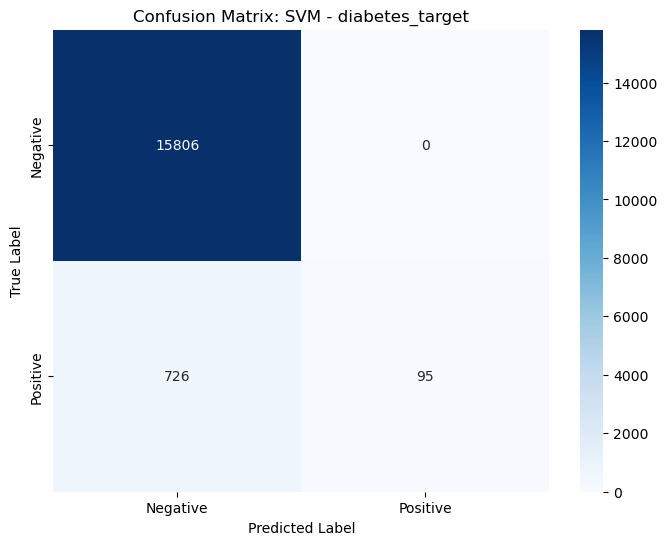


Training KNN...
Error training KNN for diabetes_target: 'NoneType' object has no attribute 'split'

Training Naive Bayes...
Naive Bayes Accuracy: 0.9504
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15806
           1       0.50      0.22      0.31       821

    accuracy                           0.95     16627
   macro avg       0.73      0.61      0.64     16627
weighted avg       0.94      0.95      0.94     16627



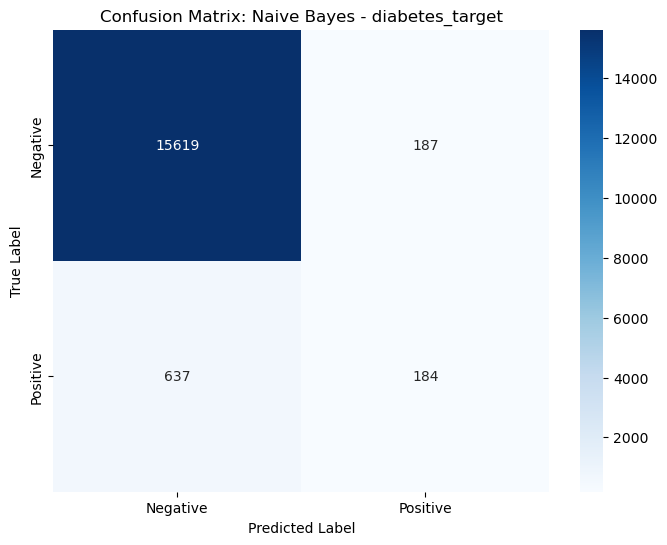


Training Random Forest...
Random Forest Accuracy: 0.9597
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15806
           1       0.89      0.21      0.34       821

    accuracy                           0.96     16627
   macro avg       0.92      0.60      0.66     16627
weighted avg       0.96      0.96      0.95     16627



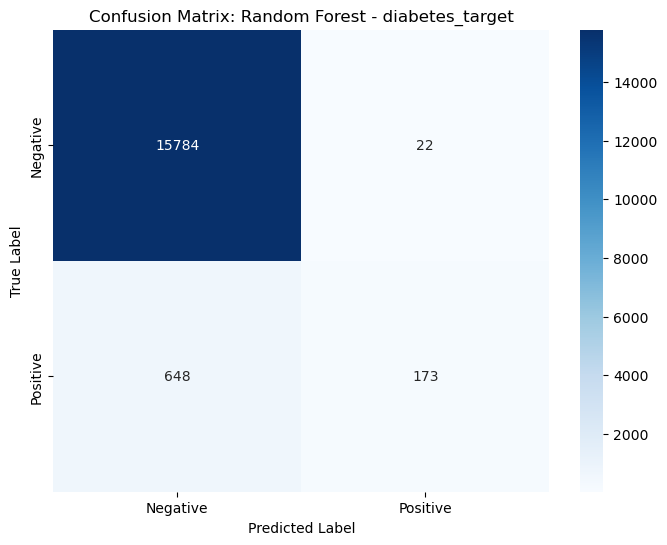


Results for heart_target:

Training SVM...
SVM Accuracy: 0.8847
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      9815
           1       0.84      0.88      0.86      6812

    accuracy                           0.88     16627
   macro avg       0.88      0.88      0.88     16627
weighted avg       0.89      0.88      0.89     16627



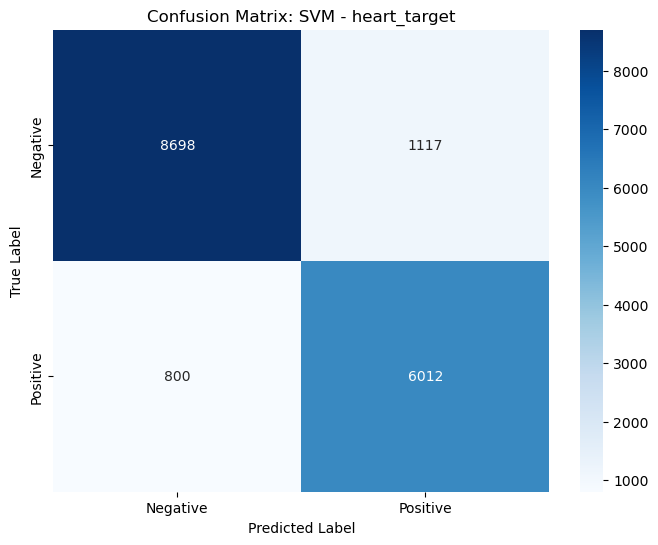


Training KNN...
Error training KNN for heart_target: 'NoneType' object has no attribute 'split'

Training Naive Bayes...
Naive Bayes Accuracy: 0.8346
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      9815
           1       0.82      0.76      0.79      6812

    accuracy                           0.83     16627
   macro avg       0.83      0.82      0.83     16627
weighted avg       0.83      0.83      0.83     16627



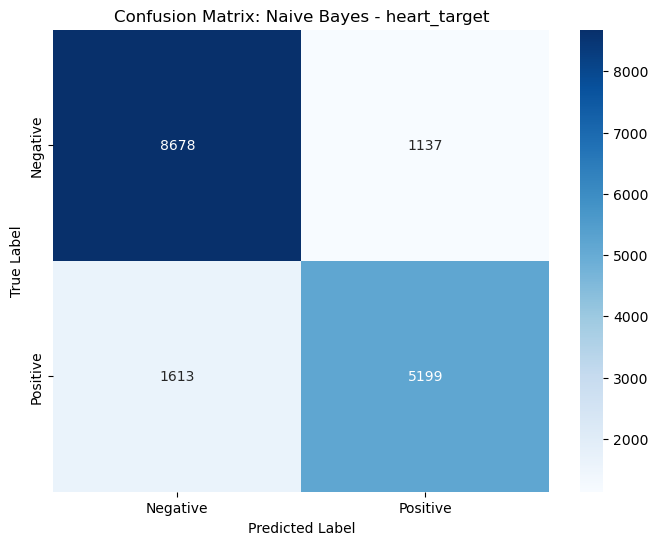


Training Random Forest...
Random Forest Accuracy: 0.9497
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9815
           1       0.93      0.95      0.94      6812

    accuracy                           0.95     16627
   macro avg       0.95      0.95      0.95     16627
weighted avg       0.95      0.95      0.95     16627



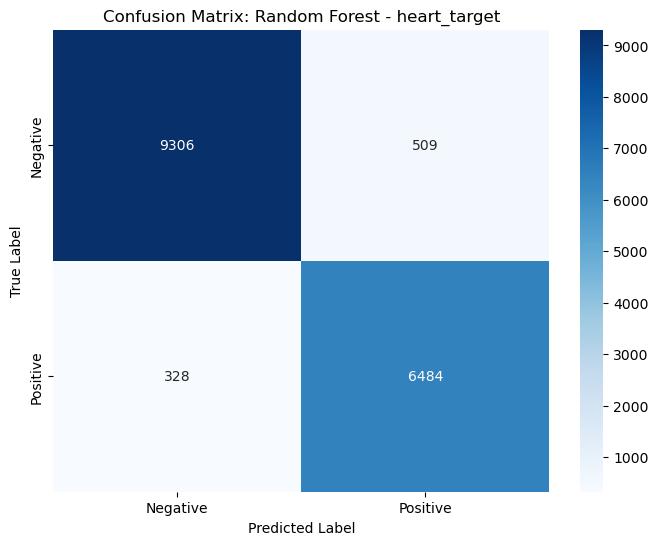


Results for stroke_target:

Training SVM...
SVM Accuracy: 0.8846
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      9807
           1       0.84      0.88      0.86      6820

    accuracy                           0.88     16627
   macro avg       0.88      0.88      0.88     16627
weighted avg       0.89      0.88      0.89     16627



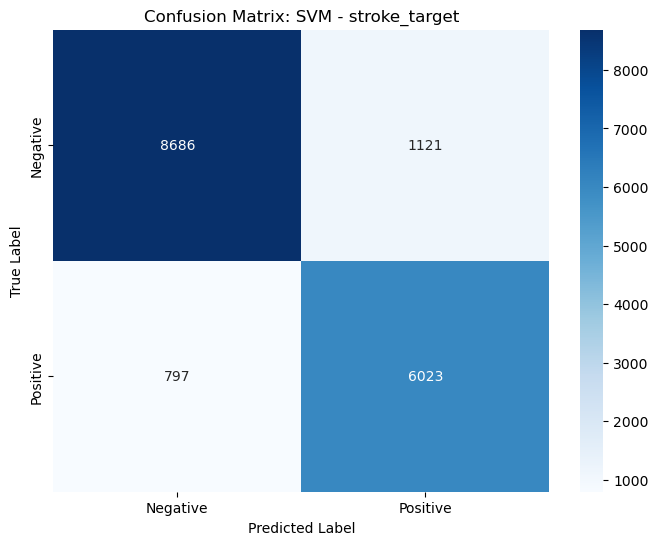


Training KNN...
Error training KNN for stroke_target: 'NoneType' object has no attribute 'split'

Training Naive Bayes...
Naive Bayes Accuracy: 0.8342
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      9807
           1       0.82      0.76      0.79      6820

    accuracy                           0.83     16627
   macro avg       0.83      0.82      0.83     16627
weighted avg       0.83      0.83      0.83     16627



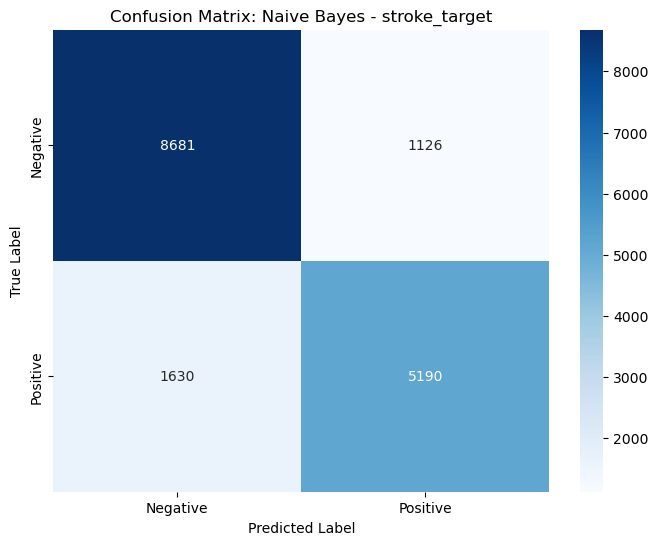


Training Random Forest...
Random Forest Accuracy: 0.9478
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9807
           1       0.93      0.95      0.94      6820

    accuracy                           0.95     16627
   macro avg       0.94      0.95      0.95     16627
weighted avg       0.95      0.95      0.95     16627



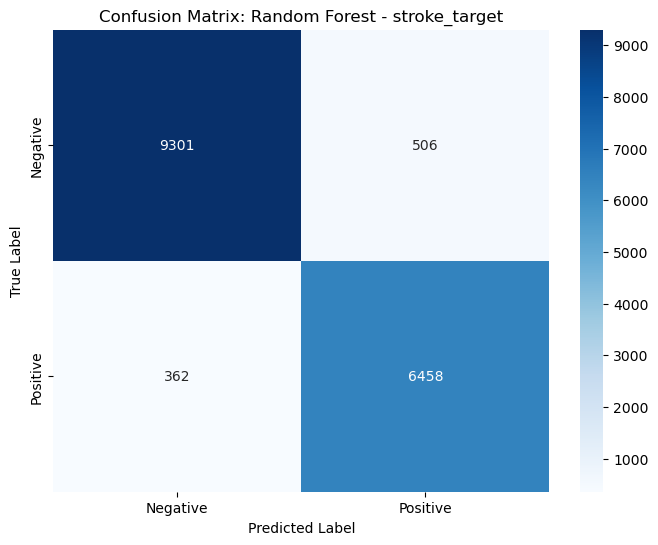


Results for hypertension_target:

Training SVM...
SVM Accuracy: 0.6741
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      9942
           1       0.59      0.64      0.61      6685

    accuracy                           0.67     16627
   macro avg       0.66      0.67      0.67     16627
weighted avg       0.68      0.67      0.68     16627



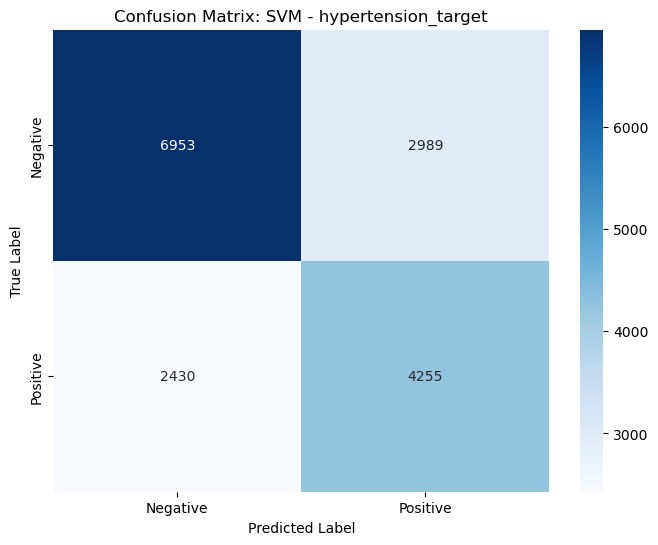


Training KNN...
Error training KNN for hypertension_target: 'NoneType' object has no attribute 'split'

Training Naive Bayes...
Naive Bayes Accuracy: 0.6313
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      9942
           1       0.55      0.46      0.50      6685

    accuracy                           0.63     16627
   macro avg       0.61      0.60      0.60     16627
weighted avg       0.62      0.63      0.62     16627



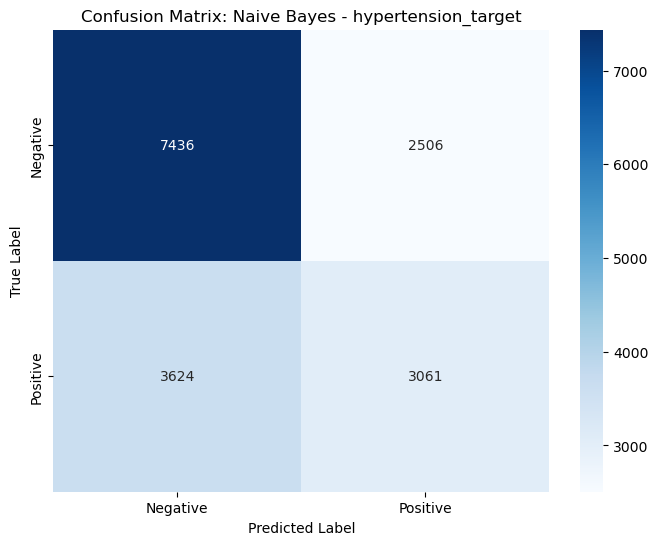


Training Random Forest...
Random Forest Accuracy: 0.9295
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9942
           1       0.91      0.91      0.91      6685

    accuracy                           0.93     16627
   macro avg       0.93      0.93      0.93     16627
weighted avg       0.93      0.93      0.93     16627



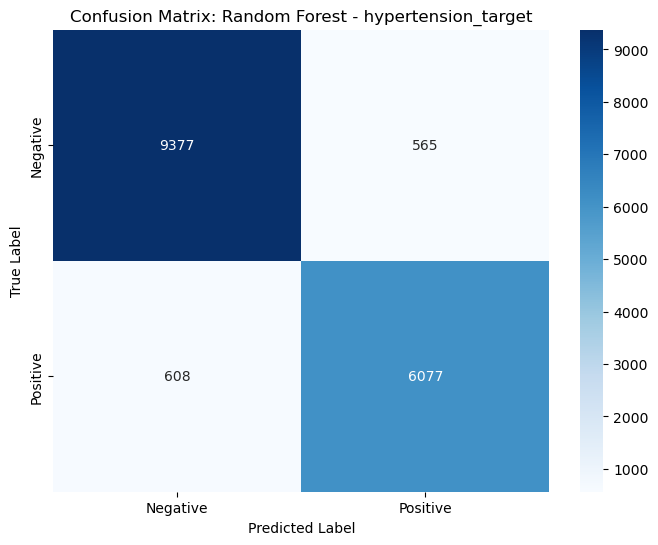

In [21]:
# Main execution
def run_pipeline(resampled_data, method='random'):
    """
    Run the complete pipeline
    """
    print(f"\nProcessing {method.upper()} oversampled datasets...")
    
    # Merge datasets
    merged_df = merge_datasets_with_pandas(resampled_data, method)
    print(f"Merged dataset shape: {merged_df.shape}")
    
    # Check for NaN values before preparation
    print("\nMissing values before preparation:")
    print(merged_df.isna().sum())
    
    # Prepare data
    X, y = prepare_data(merged_df)
    print("\nData prepared with features:", X.shape)
    print("Target variables:", y.columns.tolist())
    
    # Verify no NaN values after preparation
    print("\nMissing values after preparation:")
    print("Features:", X.isna().sum().sum())
    print("Targets:", y.isna().sum().sum())

    results = train_evaluate_models(X, y)
    return results

# Run the pipeline for each oversampling method
# methods = ['random', 'smote', 'adasyn']
methods = ['smote']
all_results = {}

for method in methods:
    print(f"\n{'='*50}")
    print(f"Running pipeline for {method.upper()} oversampling")
    print(f"{'='*50}")
    try:
        all_results[method] = run_pipeline(resampled_data, method)
    except Exception as e:
        print(f"Error processing {method} method: {str(e)}")
        continue